In [1]:
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Downlorad data from website into data folder.

In [7]:
isExist = os.path.exists('Data')
if not isExist:

   # Create a new directory because it does not exist
   os.makedirs('Data')

In [3]:
df = pd.read_csv('/Users/xin/Library/CloudStorage/OneDrive-UniversityofBristol/DST/DST-assessment-3/Data/stroke.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Remove the 'id' column.

In [5]:
df.drop('id', axis = 1, inplace = True)

In [6]:
df.head() 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


'bmi' is the only column with misssing values, we will try to impute the bmi values in our data pre-processing.

([<matplotlib.patches.Wedge at 0x167ccebd0>,
 [Text(-1.0871361453364168, 0.16773491438301513, '0'),
  Text(1.087136143373357, -0.16773492710614463, '1')],
 [Text(-0.5929833520016818, 0.0914917714816446, '95.13%'),
  Text(0.592983350930922, -0.09149177842153342, '4.87%')])

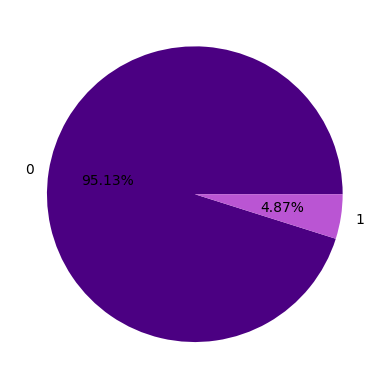

In [8]:
colors = [ 'indigo','mediumorchid']
labels = df['stroke'].value_counts().keys().map(str)
values = df['stroke'].value_counts()
plt.pie(values,colors=colors,labels=labels,autopct='%1.2f%%')

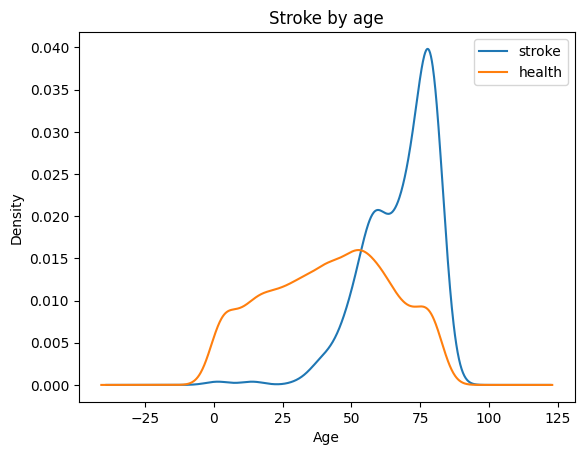

In [9]:
stroke = df.loc[df['stroke']==1]['age'].plot.kde()
health = df.loc[df['stroke']==0]['age'].plot.kde()
plt.xlabel('Age')
plt.legend(['stroke','health'])
plt.title('Stroke by age')
plt.show()

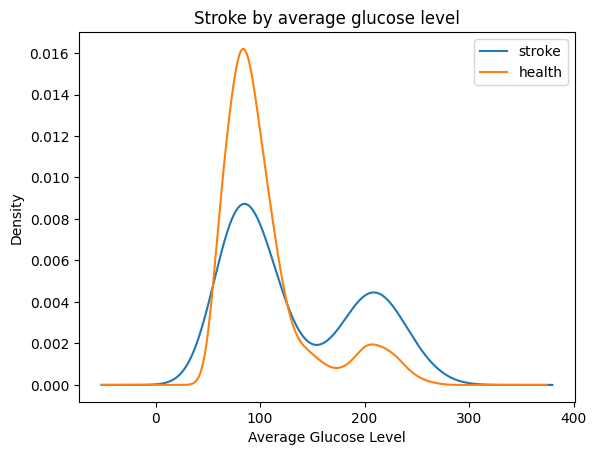

In [26]:
stroke = df.loc[df['stroke']==1]['avg_glucose_level'].plot.kde()
health = df.loc[df['stroke']==0]['avg_glucose_level'].plot.kde()
plt.xlabel('Average Glucose Level')
plt.legend(['stroke','health'])
plt.title('Stroke by average glucose level')
plt.show()

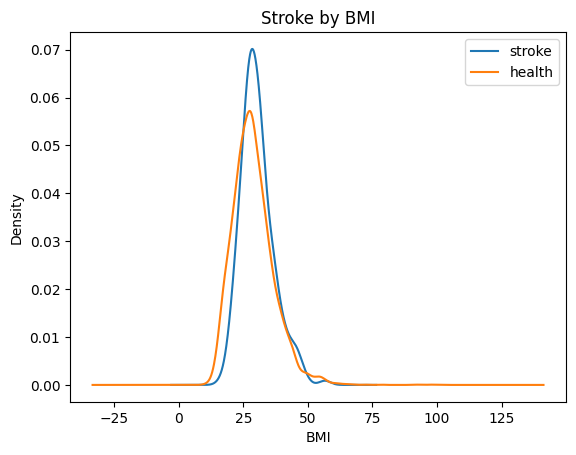

In [10]:
stroke = df.loc[df['stroke']==1]['bmi'].plot.kde()
health = df.loc[df['stroke']==0]['bmi'].plot.kde()
plt.xlabel('BMI')
plt.legend(['stroke','health'])
plt.title('Stroke by BMI')
plt.show()

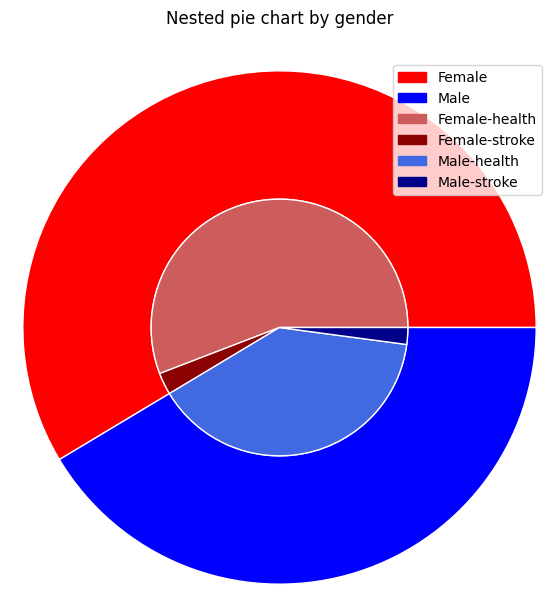

In [11]:
f0 = df.loc[df['gender']=='Female']['stroke'].value_counts()[0]
f1 = df.loc[df['gender']=='Female']['stroke'].value_counts()[1]
m0 = df.loc[df['gender']=='Male']['stroke'].value_counts()[0]
m1 = df.loc[df['gender']=='Male']['stroke'].value_counts()[1]

size = 2 

data = np.array([[f0, f1],
                 [m0, m1]])

# normalizing data to 2 pi
norm = data / np.sum(data)*2 * np.pi

# obtaining ordinates of bar edges
left = np.cumsum(np.append(0, norm.flatten()[:-1])).reshape(data.shape)

outtercol = ['red','blue']
innercol = ['indianred','darkred','royalblue','darkblue']

#fig, ax = plt.subplots(figsize =(10, 7),
                       #subplot_kw = dict(polar = True))

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7),
                       subplot_kw = dict(polar = True))
 
ax.bar(x = left[:, 0],
       width = norm.sum(axis = 1),
       bottom = 1-size,
       height = size,
       color = outtercol,
       edgecolor ='w',
       linewidth = 1,
       align ="edge")
 
ax.bar(x = left.flatten(),
       width = norm.flatten(),
       bottom = 1-2 * size,
       height = size,
       color = innercol,
       edgecolor ='w',
       linewidth = 1,
       align ="edge")
 
ax.set(title ="Nested pie chart by gender")
ax.set_axis_off()

red_patch = mpatches.Patch(color='red', label='Female')
blue_patch = mpatches.Patch(color='blue', label='Male')
ind_red_patch = mpatches.Patch(color='indianred', label='Female-health')
darkred_patch = mpatches.Patch(color='darkred', label='Female-stroke')
royalblue_patch = mpatches.Patch(color='royalblue', label='Male-health')
darkblue_patch = mpatches.Patch(color='darkblue', label='Male-stroke')

plt.legend(handles=[red_patch,blue_patch,ind_red_patch,darkred_patch,royalblue_patch,darkblue_patch])
 
# show plot
#plt.show()

Nested pie chart: https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

## Preprocessing

All columns apart from normal need to be converted to factor or a numeric.

In [30]:
cols_fac = [0, 2, 3, 4, 5, 6, 9]

for col in cols_fac:
  df.iloc[:,col].astype("category")


In [31]:
v =  range(10)
cols_num = [col for col in v if col not in cols_fac]

In [32]:
for col in cols_num:
  df.iloc[:,col].astype("float")